# Data Science Notebook
### MGTA 611 Business Applications of Artificial Intelligence
### Sarah Mansoor
### February 20, 2023

### Table of Contents
* Introduction
* Data Preperation
* Data Exploration and Analysis
* Data Visualization
* Data Modelling (Machine Learning)

### Introduction
#### Business Problem

The Midcontinent Independent System Operator (MISO) energy market is a complex system that involves electricity suppliers, traders, and customers. One of the major challenges of the MISO market is its susceptibility to significant price fluctuations, which can result in uncertainty for market participants and consumers. These price fluctuations may be due to various factors such as changes in fuel prices, transmission constraints, and weather events. Through this project I hope to understand some of this volatility. 

The data provided through MISO can be used to study the behavior of market players, the impact of market conditions on prices and quantities, and the effectiveness of policies aimed at promoting economic efficiency and reliability in the electricity market. 

This project aims to investigate the Locational Marginal Price (LMP) value to understand its impact on the economic efficiency and reliability of the electricity market. The LMP is the price that electric suppliers receive for generating electricity at a specific location in the electricity grid. It varies depending on the demand and supply of electricity at that location and can change over every hour of a day.

This project involves both a data science and deep learning component, incorporating various data exploration, machine learning, and artificial intelligence concepts. This notebook will concentrate on the data science aspect, utilizing a blend of data exploration and machine learning techniques. This notebook will contain data from one MISO table (MISO Offers) but the following deep learning notebook will include both MISO Offers and Bids. 

The findings of this data science notebook will be useful for electricity market regulators, policymakers, and industry players. Regulators can use the results to design policies that promote economic efficiency and reliability in the electricity market. 

#### Technical Problem

The major technical problem in this notebook is to understand the target variable (the LMP) and it's predictors and assess their behaviour. This can be accomplished by utilizing a time series plot and other statistical tools and graphs. 

The technical components of this notebook entail data cleaning, data exploration and analysis, and the development of machine learning models to forecast the LMP.

The data cleaning is done through various methods using the pandas library. 

The data exploration and analysis involves plotting time-series plots, histograms, a correlation matrix, box plots, and scatterplots. The data was further analyzed by interpreting the mean, standard deviation, maximums, and minimums of each feature. 

By using a combination of different models, I can gain a better understanding of the energy market and identify factors that impact the reliability of the electric system. In this notebook I use linear regression models, random forest models, decision tree models, and a simple neural network. All the models were fine tuned to find the best accuracy and reduce overfitting. 

#### The Data

MISO Offers

The Miso Offers table is a data set that provides information on hourly day-ahead offers into the MISO energy market. The data is available in daily files and is organized by the date and time that the offers begin. This data set is obtained from the MISO energy market website.

The offers table provides data on the prices that electric suppliers are willing to accept or 'offer' for generating electricity during that hour, as well as the quantities in megawatts that they are willing to supply. Using this table will be heplful in understanding the supply and demand dynamics of the electricity market, and for assessing the economic efficiency of the market.

The offers table is operational every day of the year, seven days a week, and captures data from midnight to midnight based on market dates. A daily report of the table is accessible at 8:00 AM Eastern Standard Time, on the day after the Real-Time Market closes.

The table contains data on the region, the beginning and end time, the LMP, the MW available, economic maximum and minimum, the emergency maximum and minimum, and 10 prices with their relative MW. 

The defined region falls under the MISO footprint and can be categorized as North, Central, or South. 

The beginning and end time indicate the duration of the offer and are presented in Eastern Standard Time. The format for the time is as follows: MM/DD/YYYY HH24:MM.

The LMP refers to the Locational Marginal Price linked to the offer. It reflects the market clearing price for a particular Commercial Pricing Node (CPNode) within the MISO Market, which accounts for the cost of providing the next unit of power at that location. LMPs consist of three elements, including marginal energy, marginal congestion, and marginal loss components, which are all used for settlement purposes. Whether it's a purchase or sale, the LMP value remains the same for that specific node.

The MW represents the quantity of energy in megawatts (MW) to which the offer applies.

The economic maximum and minimum represents the maximum and minimum energy storage level in MWh for storage resources.

The emergency maximum and minimum represents the emergency maximum and minimum energy storage level in MWh for storage resources. 

The 10 prices and their relative MW is the Price MW Offer Curve. Up to ten Offer blocks can be submitted per CPNode location. The MW quantity/price representing the maximum price (positive or negative without price caps) the MP is willing to pay to purchase the desired MW of Energy. 


## Data Preparation
### Loading Data from Big Query to Notebook

In [1]:
# Import bigquery from the google cloud library
# Import service account from the google oauth2 library
from google.cloud import bigquery
from google.oauth2 import service_account

In [2]:
# Initialize credentials using the service account json key file
credentials = service_account.Credentials.from_service_account_file(
    'misoelect-16349cd8bba4.json')
project_id = 'misoelect'
# Initilize the client in big query with the following credentials and project ID
client = bigquery.Client(credentials= credentials, project=project_id)

#### MISO Offers Table

The first step is to load the MISO Offers table from big query. I will have to limit the number of rows that are queried since there are too many rows in the table for the notebook to take in. I will also import the regions Central, North, and South. 

In [3]:
# Load the miso_offers table from the misodb in misoelect's bigquery
miso_offers = "misoelect.misodb.miso_offers"
# Query for the table using only the year 2016
query_job = client.query("""
SELECT * 
FROM `misoelect.misodb.miso_offers`
WHERE
((Region = 'Central') OR (Region = 'South') OR (Region = 'North'))
AND
(BeginningTimeEST BETWEEN '2016-01-01 00:00:00' AND '2016-12-31 12:00:00')
LIMIT 100000
""")
# Wait for the job to complete.
results = query_job.result() 
# Create dataframe from results
miso_offers_df = results.to_dataframe()

Now let's view the first and last 5 rows of the miso offers data frame

In [4]:
# View the first 5 rows of the miso offers data frame
miso_offers_df.head()

Region  OwnerCode UnitCode  UnitType    BeginningTimeEST  \
0  Central  122062517     2968         4 2016-10-06 00:00:00   
1  Central  122062517     2968         4 2016-10-06 01:00:00   
2  Central  122062517     2968         4 2016-10-06 02:00:00   
3  Central  122062517     2968         4 2016-10-06 03:00:00   
4  Central  122062517     2968         4 2016-10-06 04:00:00   

           EndTimeEST  EconomicMax  EconomicMin  EmergencyMax  EmergencyMin  \
0 2016-10-06 01:00:00        492.0        280.0         492.0         250.0   
1 2016-10-06 02:00:00        492.0        280.0         492.0         250.0   
2 2016-10-06 03:00:00        492.0        280.0         492.0         250.0   
3 2016-10-06 04:00:00        492.0        280.0         492.0         250.0   
4 2016-10-06 05:00:00        492.0        280.0         492.0         250.0   

   ...    MW6  Price7    MW7  Price8    MW8  Price9    MW9  Price10   MW10  \
0  ...  351.0   19.51  373.0   19.72  396.0    20.0  426.0    20.84  515.0   
1  ...  351.0   19.51  373.0   19.72  396.0    20.0  426.0    20.84  515.0   
2  ...  351.0   19.51  373.0   19.72  396.0    20.0  426.0    20.84  515.0   
3  ...  351.0   19.51  373.0   19.72  396.0    20.0  426.0    20.84  515.0   
4  ...  351.0   19.51  373.0   19.72  396.0    20.0  426.0    20.84  515.0   

   Slope  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 40 columns]

In [5]:
# View the last 5 rows of the miso offers data frame
miso_offers_df.tail()

Region  OwnerCode UnitCode  UnitType    BeginningTimeEST  \
99995  Central  576468116     3888        27 2016-08-17 11:00:00   
99996  Central  576468116     3888        27 2016-08-17 12:00:00   
99997  Central  576468116     3888        27 2016-08-17 13:00:00   
99998  Central  576468116     3888        27 2016-08-17 14:00:00   
99999  Central  576468116     3888        27 2016-08-17 15:00:00   

               EndTimeEST  EconomicMax  EconomicMin  EmergencyMax  \
99995 2016-08-17 12:00:00         77.0         20.0          82.0   
99996 2016-08-17 13:00:00         77.0         20.0          82.0   
99997 2016-08-17 14:00:00         77.0         20.0          82.0   
99998 2016-08-17 15:00:00         77.0         20.0          82.0   
99999 2016-08-17 16:00:00         77.0         20.0          82.0   

       EmergencyMin  ...  MW6  Price7  MW7  Price8  MW8  Price9  MW9  Price10  \
99995          20.0  ...  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   
99996          20.0  ...  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   
99997          20.0  ...  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   
99998          20.0  ...  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   
99999          20.0  ...  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   

       MW10  Slope  
99995   NaN      1  
99996   NaN      1  
99997   NaN      1  
99998   NaN      1  
99999   NaN      1  

[5 rows x 40 columns]

In [6]:
# The shape of the data (number of rows, number of columns)
miso_offers_df.shape

(100000, 40)

There are initially 40 columns in the dataframe and ___ rows. 

In [7]:
# The data types of each column 
miso_offers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Region                 100000 non-null  object        
 1   OwnerCode              100000 non-null  Int64         
 2   UnitCode               100000 non-null  object        
 3   UnitType               100000 non-null  Int64         
 4   BeginningTimeEST       100000 non-null  datetime64[ns]
 5   EndTimeEST             100000 non-null  datetime64[ns]
 6   EconomicMax            100000 non-null  float64       
 7   EconomicMin            100000 non-null  float64       
 8   EmergencyMax           100000 non-null  float64       
 9   EmergencyMin           100000 non-null  float64       
 10  EconomicFlag           100000 non-null  Int64         
 11  EmergencyFlag          100000 non-null  Int64         
 12  MustRunFlag            100000 non-null  Int64

The data is now loaded onto the notebook but it must be cleaned before using for exploration. 

### Cleaning Data

In this stage, I will remove any irrelevant columns and the columns that contain entirely null values. Columns that were explicitly mentioned in the MISO Offers Reader's Guide report as no longer relevant were labeled as such, and will be removed. These include the Unit Type, Owner Code, Economic Flag, Unit Available flag, Slope and Emergency Flag. You can find the Reader's Guide [here](https://docs.misoenergy.org/marketreports/Day-Ahead%20Cleared%20Offers%20Readers%20Guide.pdf) for more information. 

In [8]:
# Import pandas library
import pandas as pd

In [9]:
# remove CurtailmentOfferPrice, TargetMWReduction since they are all NAs
# remove UnitType, OwnerCode, Economic Flag, Unit Available flag, Slope,
# and Emergency Flag as they no longer are relevant according 
# to the Miso Offers report
miso_offers_df = miso_offers_df.drop(columns=['CurtailmentOfferPrice', 'TargetMWReduction', 
                                              'UnitType', 'OwnerCode', 'EconomicFlag', 
                                              'UnitAvailableFlag', 'EmergencyFlag', 'Slope'])

In [10]:
# drop NAs
miso_offers_df = miso_offers_df.dropna(subset=['EconomicMax', 'EconomicMin', 
                                               'EmergencyMax', 'EmergencyMin',
                                               'Price1', 'MW1', 'Price2', 'MW2', 
                                               'Price3', 'MW3', 'Price4', 'MW4', 
                                               'Price5', 'MW5', 'Price6', 'MW6',
                                               'Price7', 'MW7', 'Price8', 'MW8', 
                                               'Price9', 'MW9', 'Price10', 'MW10', 
                                               'LMP', 'MW', 'SelfScheduledMW',
                                               'MustRunFlag', 'UnitCode'])

In [11]:
# remove duplicates
miso_offers_df = miso_offers_df.drop_duplicates()

In [12]:
# Convert Region to Categorical
import pandas as pd

# Convert the Region column to categorical
miso_offers_df['Region'] = pd.Categorical(miso_offers_df['Region'], 
                                          categories=['Central', 'South', 'North'], ordered=True)
miso_offers_df['Region'] = miso_offers_df['Region'].cat.codes + 1

In [13]:
miso_offers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213 entries, 0 to 98807
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            7213 non-null   int8          
 1   UnitCode          7213 non-null   object        
 2   BeginningTimeEST  7213 non-null   datetime64[ns]
 3   EndTimeEST        7213 non-null   datetime64[ns]
 4   EconomicMax       7213 non-null   float64       
 5   EconomicMin       7213 non-null   float64       
 6   EmergencyMax      7213 non-null   float64       
 7   EmergencyMin      7213 non-null   float64       
 8   MustRunFlag       7213 non-null   Int64         
 9   SelfScheduledMW   7213 non-null   float64       
 10  MW                7213 non-null   float64       
 11  LMP               7213 non-null   float64       
 12  Price1            7213 non-null   float64       
 13  MW1               7213 non-null   float64       
 14  Price2            7213 

All the missing values and duplicates in the dataframe have been removed. We now have a total of 32 columns with 7213 rows. 

### Data Exploration and Analysis

To explore the data first I will get the summary values of the columns. From there I can visualize the trends in the data relating to LMP and it's predictors. I will use a combination of libraries including pandas, numpy, matplotlib, seaborn, and scikit learn. 

In [14]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.ticker as ticker

In [15]:
# Get the mean, std, min, max and 3 quartiles for the following columns: 'LMP', 
# 'MW','EconomicMax', 'EconomicMin', 'EmergencyMax', 'EmergencyMin', 
# 'SelfScheduledMW', 'MustRunFlag'
miso_offers_df[['LMP', 'MW','EconomicMax', 'EconomicMin', 'EmergencyMax', 'EmergencyMin', 
               'SelfScheduledMW']].describe()

LMP           MW  EconomicMax  EconomicMin  EmergencyMax  \
count  7213.000000  7213.000000  7213.000000  7213.000000   7213.000000   
mean     30.161300   136.844586   223.723277   119.150589    239.917163   
std      11.028028   188.760082   180.643041   104.333449    186.205588   
min       4.550000     0.000000     0.000000     0.000000      0.000000   
25%      21.500000     0.000000    75.600000    45.000000     83.600000   
50%      27.870000     0.000000   150.000000    80.000000    157.000000   
75%      37.570000   235.000000   361.000000   180.000000    417.000000   
max      91.580000   624.000000   624.000000   525.000000    624.000000   

       EmergencyMin  SelfScheduledMW  
count   7213.000000      7213.000000  
mean     104.099875        26.286982  
std       88.174335        66.813708  
min        0.000000         0.000000  
25%       45.000000         0.000000  
50%       80.000000         0.000000  
75%      160.000000         0.000000  
max      520.000000       480.000000

The mean LMP is \\$30.16 with a standard deviation of 11.02. The maximum LMP is 91.58 while the minimum is 4.55. The LMP may be skewed to the right as the mean is less than the maximum value. The standard deviation is also on the higher end which indicates quite a bit of variability for the LMP. The wide range between the maximum and minimum values indicates that there is significant price volatility in the MISO market. This provides a decent insight into what we should look for when we plot the LMP against time and when trying to forecast it's values. 

The mean MW is 136.84 with a standard deviation of 188.76. The minimum is 0 and the maximum is 624. This indicates that the distribution of MW values is not symmetric and may be skewed to the left. The standard deviation is also very high which indicates a wide range of values and a lot of variability in the MW offered.

The mean economic maximum for storage resources is 223.72 MWh, indicating that, on average, these resources can store up to 223.72 MWh of energy. The mean economic minimum for storage resources is 119.15 MWh, indicating that, on average, they are able to store at least 119.15 MWh of energy. 

The mean emergency maximum for storage resources is 239.91 MWh, indicating that, on average, these resources can store up to 239.91 MWh of energy in emergency situations. The mean emergency minimum for storage resources is 104.09 MWh, indicating that, on average, they are able to store at least 104.09 MWh of energy in emergency situations.

The mean self-scheduled MW for energy, regulating reserve, spinning reserve, or supplemental reserve is 26.28, indicating that, on average, these resources schedule 26.28 MW of energy for themselves.

In [16]:
# Get the mean, std, min, max and 3 quartiles for the following columns: 
#'Price1', 'MW1','Price2', 'MW2', 'Price3', 'MW3', 'Price4', 'MW4', 
#'Price5', 'MW5', 'Price6', 'MW6', 'Price7', 'MW7', 'Price8', 'MW8', 
#'Price9', 'MW9', 'Price10', 'MW10'
miso_offers_df[['Price1', 'MW1','Price2', 'MW2', 'Price3', 'MW3', 'Price4', 'MW4', 
                'Price5', 'MW5']].describe()

Price1          MW1       Price2          MW2       Price3  \
count  7213.000000  7213.000000  7213.000000  7213.000000  7213.000000   
mean     32.859192    72.991266    33.818234   114.218051    34.831766   
std      40.546832    88.510006    40.352145   100.062473    40.828335   
min     -10.000000     0.000000     0.000000     4.000000     0.000000   
25%      18.010000     1.000000    18.450000    48.300000    20.240000   
50%      24.130000    45.000000    24.710000    83.700000    25.000000   
75%      30.750000   100.000000    31.010000   180.000000    31.260000   
max     271.670000   480.000000   272.730000   489.500000   273.790000   

               MW3      Price4          MW4       Price5          MW5  
count  7213.000000  7213.00000  7213.000000  7213.000000  7213.000000  
mean    133.646638    36.18070   152.328241    37.962160   169.434355  
std     112.114959    41.47161   125.096106    42.782601   135.634773  
min       4.200000     0.00000     4.300000     0.000000     4.400000  
25%      51.600000    20.33000    54.900000    21.110000    58.200000  
50%      93.000000    25.57000   101.900000    26.300000   110.000000  
75%     220.000000    33.24000   283.000000    35.110000   307.000000  
max     499.000000   274.86000   540.000000   275.920000   580.000000

In [17]:
# Get the mean, std, min, max and 3 quartiles for the following columns: 
# 'Price6', 'MW6', 'Price7', 'MW7', 'Price8', 'MW8', 
#'Price9', 'MW9', 'Price10', 'MW10'
miso_offers_df[['Price6', 'MW6', 'Price7', 'MW7', 'Price8', 'MW8', 
                'Price9', 'MW9', 'Price10', 'MW10']].describe()

Price6          MW6       Price7          MW7       Price8  \
count  7213.000000  7213.000000  7213.000000  7213.000000  7213.000000   
mean     38.532202   187.879717    41.060865   200.954222    42.428960   
std      42.876059   149.184632    44.545218   156.632258    45.186829   
min       0.000000     4.500000     0.000000     4.600000     0.000000   
25%      21.330000    62.300000    21.860000    70.000000    23.420000   
50%      26.310000   117.500000    28.380000   127.000000    29.160000   
75%      36.560000   340.000000    37.700000   356.200000    39.330000   
max     276.980000   581.000000   278.050000   583.000000   279.110000   

               MW8       Price9          MW9      Price10         MW10  
count  7213.000000  7213.000000  7213.000000  7213.000000  7213.000000  
mean    216.231596    44.713797   230.409289    45.798955   246.743921  
std     167.986885    45.275229   178.171450    45.258323   191.971848  
min       4.700000     0.000000     4.800000     0.000000     4.900000  
25%      74.400000    24.090000    79.000000    24.970000    85.000000  
50%     138.000000    30.660000   149.000000    31.920000   158.300000  
75%     375.400000    45.610000   400.000000    46.780000   420.000000  
max     584.000000   280.180000   616.000000   281.240000   638.000000

From the statistical analysis of the price-MW pairs, it can be observed that the prices and MW have similar means around \\$32-\\$45 and 72MWh-247MWh, respectively. The standard deviations follow a similar pattern as well. The minimum value for all the prices is 0, while the minimum for only MW1 is 0, and MW2 to MW10 are higher than 12. The mean and variability of both the prices and MW increase as the price-MW pair increases. For example, price1-MW1 has a mean of \\$32.85-72.99MWh, while price10-MW10 has a mean of \\$45.79-246.74MWh.

### Data Visualization

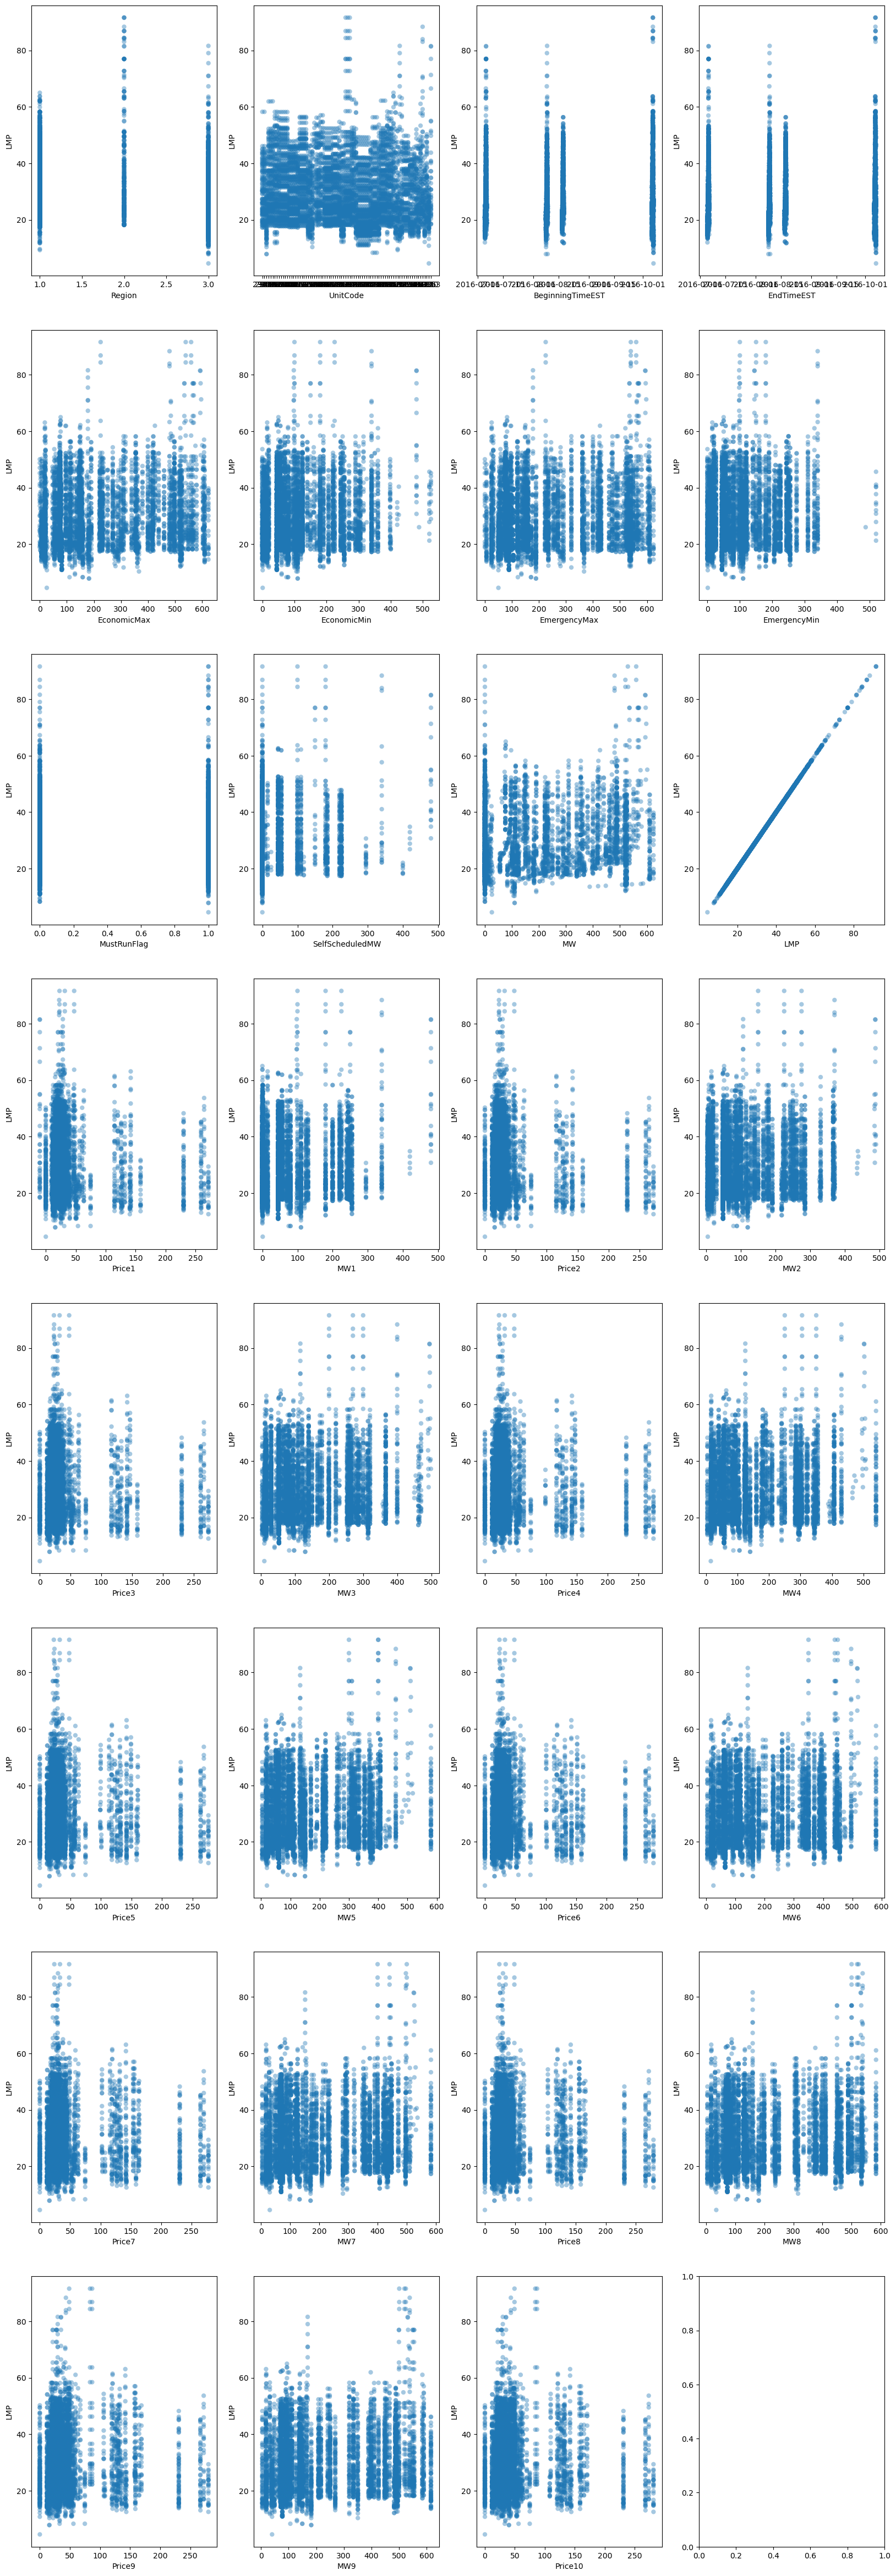

In [18]:
# Distribution of different features in comparison with the target 
# variable is illustrated below.
# Set up the figure
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 60))
cols = miso_offers_df.columns
# Show each boxplot
for i, ax in enumerate(ax.flatten()):
    try:
        sns.scatterplot(x = cols[i], y = "LMP", data = miso_offers_df, 
                        ax = ax, edgecolor='none', alpha=0.4)
        plt.xticks(cols[i])
    except:
        pass

# Show the figure
plt.show()

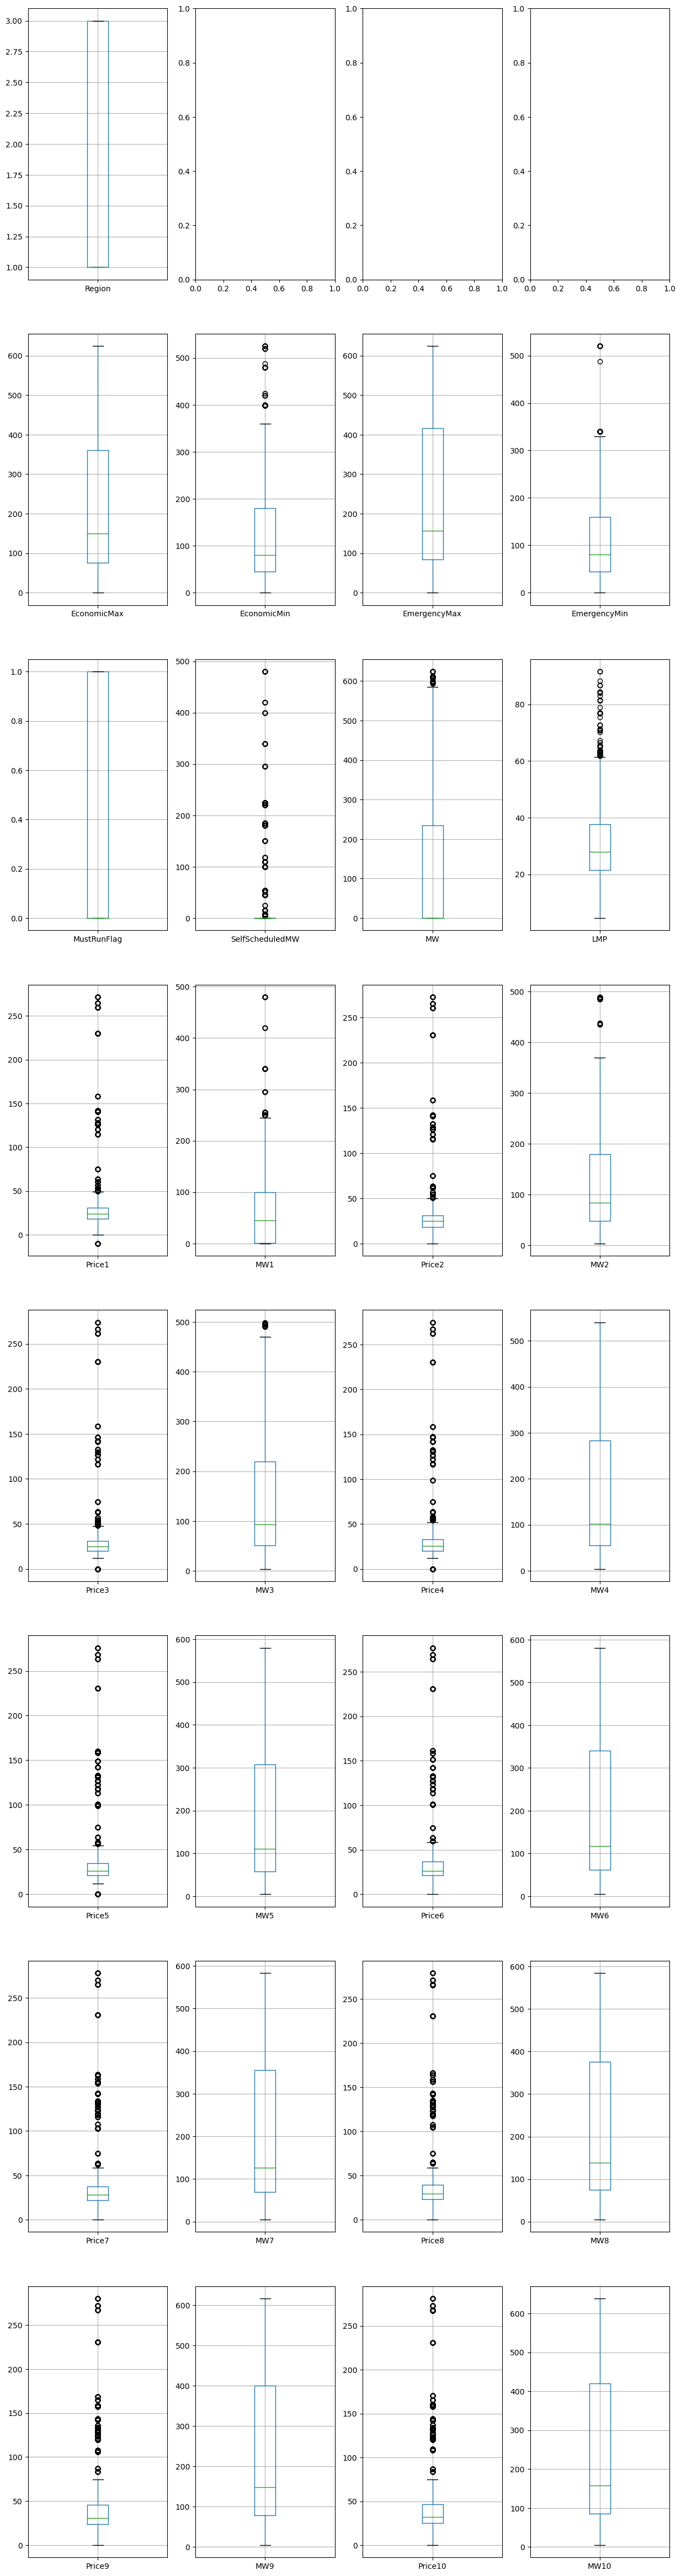

In [19]:
# Dropping the outliers
# Set up the figure
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(15, 60))

# Show each boxplot
for i, ax in enumerate(ax.flatten()):
    try:
        miso_offers_df.iloc[:,[i]].boxplot(ax=ax)
    except:
        pass

# Show the figure
plt.show()

I will use Isolated Forests to detect outliers and remove them. Isolated Forests is a robust anomaly detection algorithm that can efficiently identify outliers in high-dimensional datasets with complex relationships. This algorithm randomly selects a subset of features from the dataset and builds a decision tree around it. Points that are isolated from the rest of the dataset can be identified using this decision tree.

In [20]:
from sklearn.ensemble import IsolationForest

miso_offers_if = miso_offers_df[['LMP','Region',
                                'EconomicMax','EconomicMin','EmergencyMax',
                                'EmergencyMin','MustRunFlag','SelfScheduledMW','MW',
                                'Price1','MW1','Price2','MW2','Price3','MW3','Price4',
                                'MW4','Price5','MW5','Price6','MW6','Price7','MW7',
                                'Price8','MW8','Price9','MW9','Price10','MW10']]

#Train an Isolation Forest
model = IsolationForest(contamination = 0.1)
model.fit(miso_offers_if)

#Predict anomalies
predictions = model.predict(miso_offers_if)

# Get the indices of the rows with positive value in predictions
positive_indices = [i for i, x in enumerate(predictions) if x>0]

# Subset the dataframe using the indices
df_trimmed = miso_offers_if.iloc[positive_indices]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [21]:
miso_offers_if.shape

(7213, 29)

In [22]:
df_trimmed.shape

(6491, 29)

We can see that the algorithm removed 722 rows that were considered outliers in the dataset. 

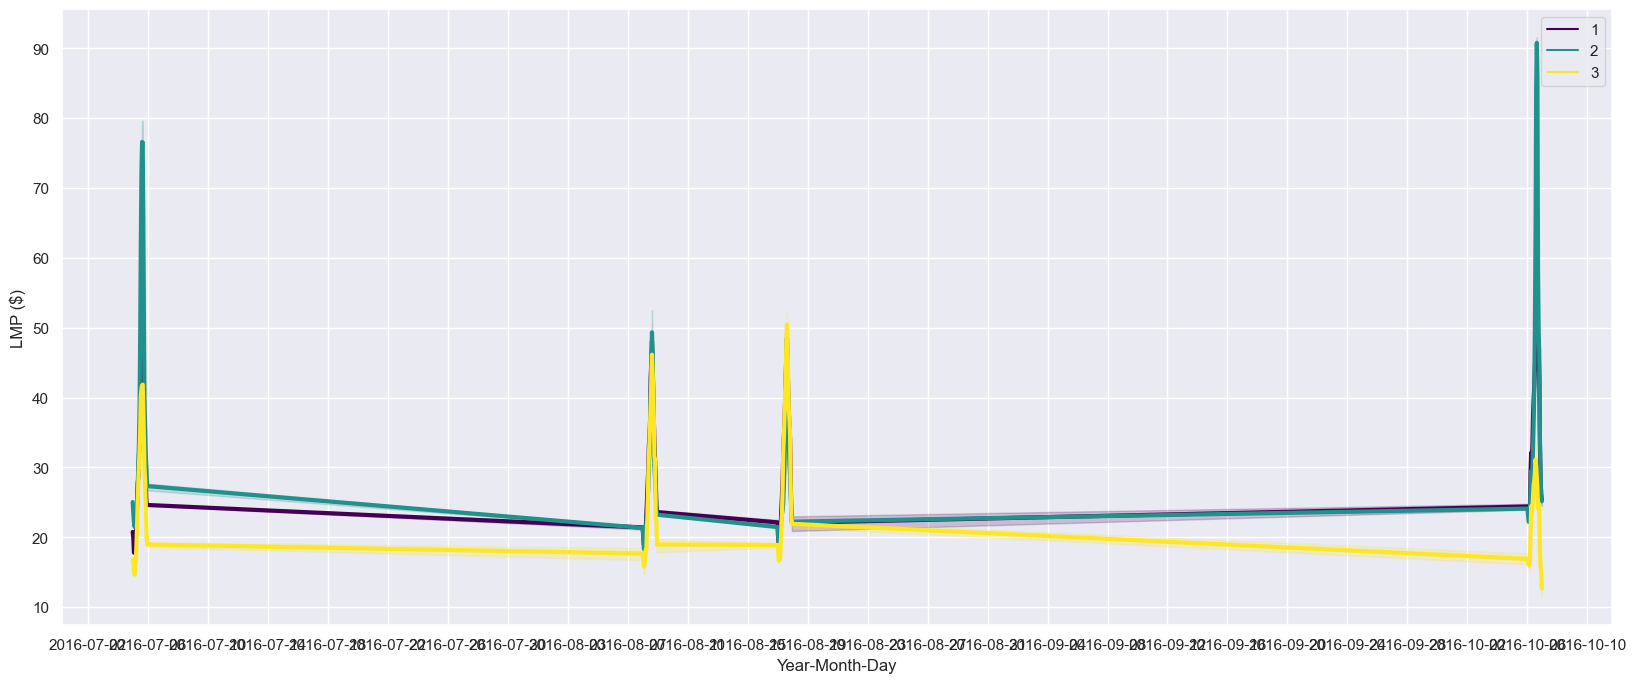

In [23]:
# Time series plot
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})

ax = sns.lineplot(data=miso_offers_df, x = 'BeginningTimeEST', y = 'LMP', 
                  hue='Region', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('LMP ($)')
plt.xlabel('Year-Month-Day')
plt.show()

This time series plot displays the behavior of LMP Offers in the Central, South, and North regions throughout the year 2016. The regions are represented by the numbers 1, 2, 3 respectively. The trend in LMP is similar for all three regions, with prices rising and falling simultaneously. However, the LMP in the South region is typically higher than the other two, while the North region has the lowest LMP. The reasons for this trend may be influenced by various factors, including the demand for electricity, available generation capacity, and regional differences in pricing and regulations.

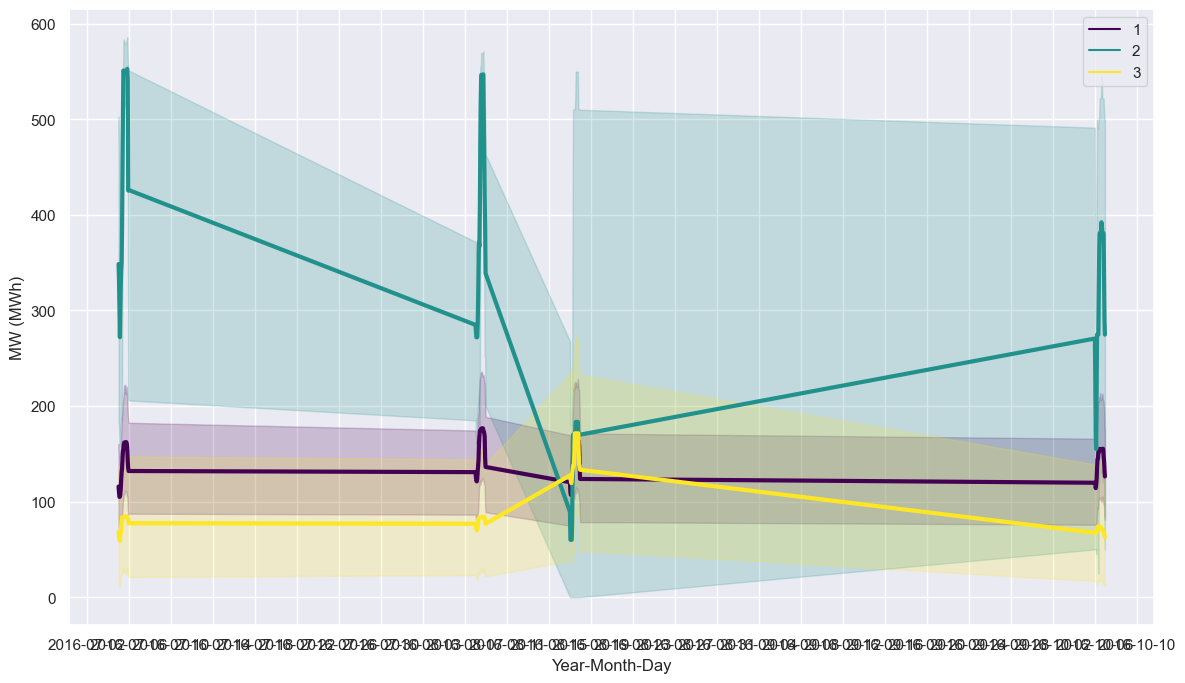

In [24]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=miso_offers_df, x = 'BeginningTimeEST', y = 'MW', 
                  hue='Region', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('MW (MWh)')
plt.xlabel('Year-Month-Day')
plt.show()

This time series plot displays the behavior of MW Offers in the Central, South, and North regions throughout the year 2016. The regions are represented by the numbers 1, 2, 3 respectively. In this plot, there is a lot more variability between the MW offers compared to the LMP offers. There are time periods where one region increases and one decreases. Again, North has the lowest MW offers while Central has the highest. There are several possible reasons for the variability in MW offers across the different regions. One possible explanation could be the differences in the availability and cost of resources used to generate electricity in each region. It is likely the North may have more access to renewable resources like wind and solar, which could result in lower MW offers. The demand for electricity varies across the regions, which also impacts the pricing of MW offers.

In [25]:
# Histogram
def histogram(data, xaxis, maintitle):
    # Create the histogram
    fig, ax = plt.subplots(figsize = (6,4))
    # Plot histogram
    data.plot(kind = "hist", density = True, bins = 15) 
    # change density to true, because KDE uses density
    # Plot KDE
    data.plot(kind = "kde")
    # X #
    ax.set_xlabel(xaxis)
    # Overall #
    ax.set_title(maintitle)
    plt.show()

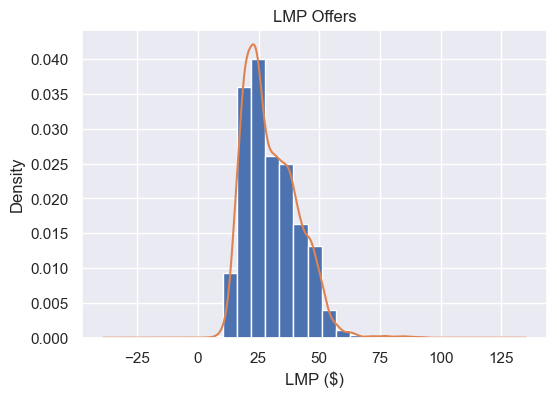

In [26]:
histogram(miso_offers_df['LMP'], 'LMP ($)', 'LMP Offers')

This histogram shows the density distribution of LMP offers across all regions. The plot indicates a slightly skewed trend to the right, with more offers falling in the lower price range and fewer offers in the higher price range. The mean LMP was found to be \\$30.16, and the maximum LMP was 91.58, which confirms the right-skewed distribution. One possible reason for this skewness is the limited availability of energy resources in some regions (as we saw in the time series plot for MW where there was significant variability between regions in MW offers), leading to higher demand and therefore higher prices. 

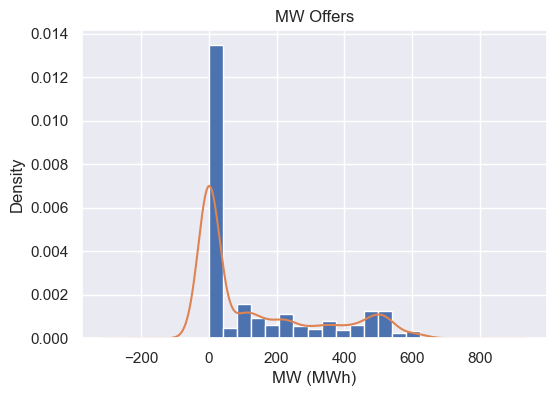

In [27]:
histogram(miso_offers_df['MW'],"MW (MWh)","MW Offers")

This histogram shows the density distribution of MW offers across all regions. The plot indicates a very skewed trend to the right, with more offers falling in the lower MW range and fewer offers in the higher MW range. As we saw, the mean MW was 155.96 with a minimum at 0 and the maximum is 560, confirming our thoughts about its skewness. One possible reason for this skewness is the again the limited amount of resources as well as demand. 

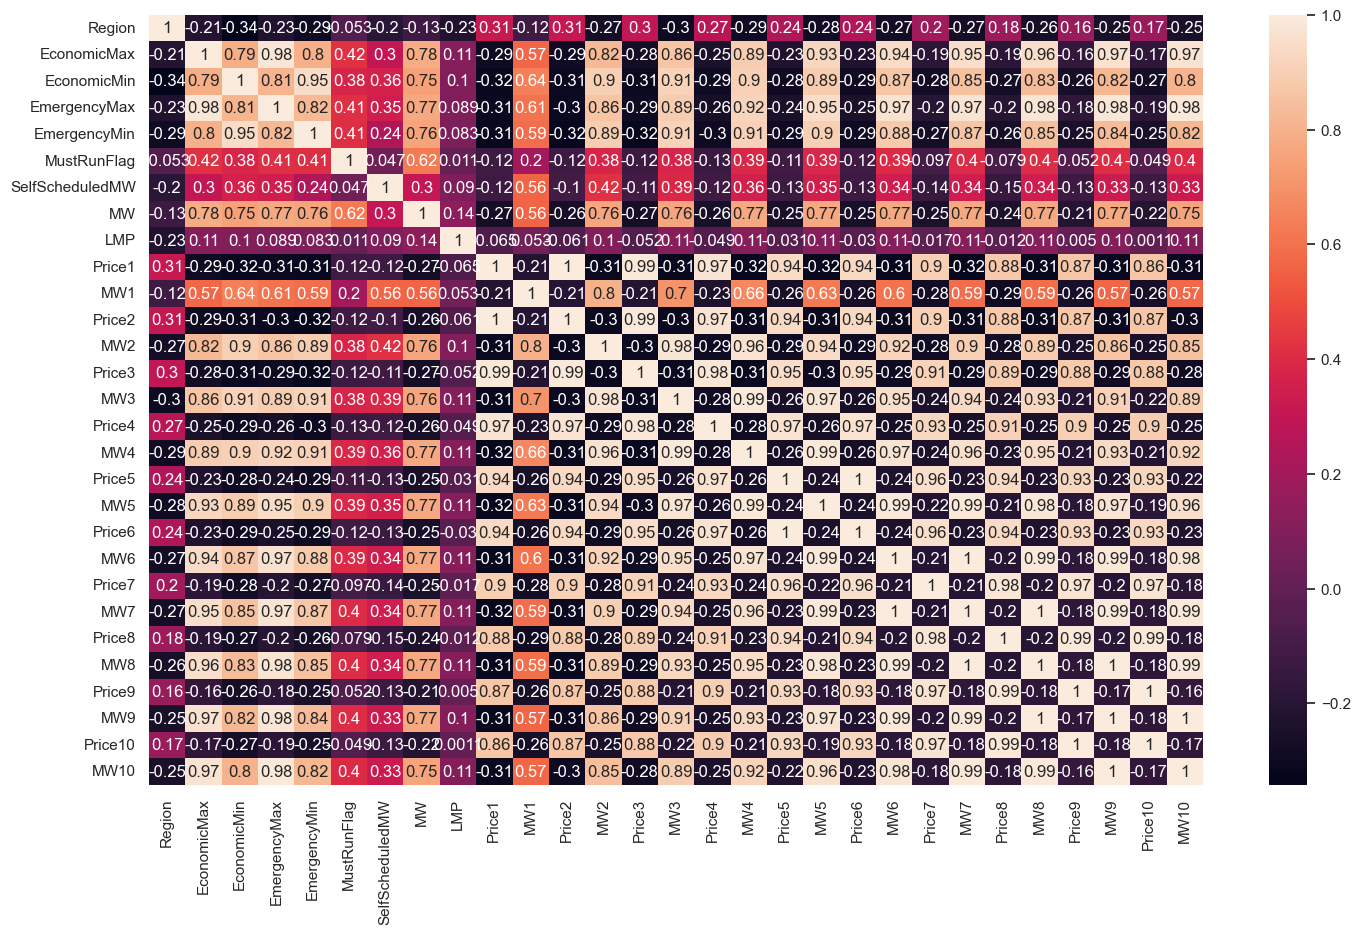

In [28]:
# Correlation Matrix
sns.set(rc={'figure.figsize':(17,10)})
corr_matrix = miso_offers_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

This correlation matrix indicates which pairs of variables have high correlation. This can give us insight into the relationships between the variables in the dataset. A high correlation between two variables indicates that they are strongly related and tend to vary together, this is indicated by the lighter colour on this matrix. This can be useful for identifying patterns and relationships in the data, as well as for selecting variables for further analysis. 

The correlation matrix shows that there are high correlations between the MW1-MW10 values. This is expected because the MW quantity represents the maximum price the MP is willing to pay to purchase the desired MW of Energy, and up to ten Offer blocks can be submitted per CPNode location. Therefore, there can be a relationship between the offer blocks, and as they increase, they may have some connection with the previous blocks. The high correlation values between MW1-MW10 suggest that the MP's decision-making process for submitting offer blocks is consistent across the different blocks. 

There are also high correlation values between the economic max/min and emergency max/min and the MW1-MW10 blocks. The economic max/min and emergency max/min values are related to the maximum and minimum MW supply available in normal and emergency situations. As a result, it is expected that they are highly correlated with the MW1-MW10 blocks, which represent the quantity of energy being offered for sale at a given price. If the available MW supply is low, it may be reflected in higher prices for the MW offers, and vice versa. 

The LMP offers have low correlation with almost all the variables. The low correlation between the LMP offers and the other variables could present a challenge in building a predictive model. The correlation is not the only factor that influences model performance so through techniques like feature engineering, I can capture more complex relationships between the predictor and other variables.

### Data Modelling

Here, I will first split up the predictors and the target variables. 

In [29]:
# Split target and predictors into y and x
# miso_offers_x = miso_offers_df[['Region','UnitCode','BeginningTimeEST', 'EndTimeEST',
#                                 'EconomicMax','EconomicMin','EmergencyMax',
#                                 'EmergencyMin','MustRunFlag','SelfScheduledMW','MW',
#                                 'Price1','MW1','Price2','MW2','Price3','MW3','Price4',
#                                 'MW4','Price5','MW5','Price6','MW6','Price7','MW7',
#                                 'Price8','MW8','Price9','MW9','Price10','MW10']]
miso_offers_x = miso_offers_df[['Region',
                                'EconomicMax','EconomicMin','EmergencyMax',
                                'EmergencyMin','MustRunFlag','SelfScheduledMW','MW',
                                'Price1','MW1','Price2','MW2','Price3','MW3','Price4',
                                'MW4','Price5','MW5','Price6','MW6','Price7','MW7',
                                'Price8','MW8','Price9','MW9','Price10','MW10']]
miso_offers_y = miso_offers_df['LMP']

In [30]:
miso_offers_x.head()

Region  EconomicMax  EconomicMin  EmergencyMax  EmergencyMin  MustRunFlag  \
0       1        492.0        280.0         492.0         250.0            0   
1       1        492.0        280.0         492.0         250.0            0   
2       1        492.0        280.0         492.0         250.0            0   
3       1        492.0        280.0         492.0         250.0            0   
4       1        492.0        280.0         492.0         250.0            0   

   SelfScheduledMW     MW  Price1    MW1  ...  Price6    MW6  Price7    MW7  \
0              0.0  492.0   17.88  200.0  ...    19.3  351.0   19.51  373.0   
1              0.0  492.0   17.88  200.0  ...    19.3  351.0   19.51  373.0   
2              0.0  492.0   17.88  200.0  ...    19.3  351.0   19.51  373.0   
3              0.0  492.0   17.88  200.0  ...    19.3  351.0   19.51  373.0   
4              0.0  492.0   17.88  200.0  ...    19.3  351.0   19.51  373.0   

   Price8    MW8  Price9    MW9  Price10   MW10  
0   19.72  396.0    20.0  426.0    20.84  515.0  
1   19.72  396.0    20.0  426.0    20.84  515.0  
2   19.72  396.0    20.0  426.0    20.84  515.0  
3   19.72  396.0    20.0  426.0    20.84  515.0  
4   19.72  396.0    20.0  426.0    20.84  515.0  

[5 rows x 28 columns]

In [31]:
miso_offers_y.head()

0    23.20
1    22.73
2    21.87
3    22.06
4    23.08
Name: LMP, dtype: float64

Now we have a X and Y dataframe to work with. 

#### Training and Testing

Here I will split up the dataframes into training and test sets. I will do this twice: once with the data itself then with the scaled (normalized) version of the data. 

In [32]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [33]:
# Here, I am using MinMaxScaler to scale the data
miso_offers_if = miso_offers_df[['LMP','Region',
                                'EconomicMax','EconomicMin','EmergencyMax',
                                'EmergencyMin','MustRunFlag','SelfScheduledMW','MW',
                                'Price1','MW1','Price2','MW2','Price3','MW3','Price4',
                                'MW4','Price5','MW5','Price6','MW6','Price7','MW7',
                                'Price8','MW8','Price9','MW9','Price10','MW10']]

scaler = MinMaxScaler()
offers_sc = miso_offers_if.copy()
offers_sc = pd.DataFrame(scaler.fit_transform(offers_sc), columns=offers_sc.columns)
offers_sc.head()

LMP  Region  EconomicMax  EconomicMin  EmergencyMax  EmergencyMin  \
0  0.214294     0.0     0.788462     0.533333      0.788462      0.480769   
1  0.208893     0.0     0.788462     0.533333      0.788462      0.480769   
2  0.199012     0.0     0.788462     0.533333      0.788462      0.480769   
3  0.201195     0.0     0.788462     0.533333      0.788462      0.480769   
4  0.212915     0.0     0.788462     0.533333      0.788462      0.480769   

   MustRunFlag  SelfScheduledMW        MW    Price1  ...   Price6       MW6  \
0          0.0              0.0  0.788462  0.098981  ...  0.06968  0.601041   
1          0.0              0.0  0.788462  0.098981  ...  0.06968  0.601041   
2          0.0              0.0  0.788462  0.098981  ...  0.06968  0.601041   
3          0.0              0.0  0.788462  0.098981  ...  0.06968  0.601041   
4          0.0              0.0  0.788462  0.098981  ...  0.06968  0.601041   

     Price7       MW7    Price8      MW8    Price9       MW9  Price10  \
0  0.070167  0.636929  0.070653  0.67547  0.071383  0.689136   0.0741   
1  0.070167  0.636929  0.070653  0.67547  0.071383  0.689136   0.0741   
2  0.070167  0.636929  0.070653  0.67547  0.071383  0.689136   0.0741   
3  0.070167  0.636929  0.070653  0.67547  0.071383  0.689136   0.0741   
4  0.070167  0.636929  0.070653  0.67547  0.071383  0.689136   0.0741   

       MW10  
0  0.805718  
1  0.805718  
2  0.805718  
3  0.805718  
4  0.805718  

[5 rows x 29 columns]

In [34]:
# Here I am splitting the scaled dataset into X and Y dataframes
offers_x_scaled = offers_sc[['Region',
                                'EconomicMax','EconomicMin','EmergencyMax',
                                'EmergencyMin','MustRunFlag','SelfScheduledMW','MW',
                                'Price1','MW1','Price2','MW2','Price3','MW3','Price4',
                                'MW4','Price5','MW5','Price6','MW6','Price7','MW7',
                                'Price8','MW8','Price9','MW9','Price10','MW10']]
offers_y_scaled = offers_sc['LMP']

In [35]:
# create training and testing vars for non-scaled data
X_train, X_test, y_train, y_test = train_test_split(miso_offers_x, 
                                                    miso_offers_y, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4327, 28) (4327,)
(2886, 28) (2886,)


In [36]:
# create training and testing vars for scaled data
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(offers_x_scaled, 
                                                                offers_y_scaled, 
                                                                test_size=0.4)
print(X_train_sc.shape, y_train_sc.shape)
print(X_test_sc.shape, y_test_sc.shape)

(4327, 28) (4327,)
(2886, 28) (2886,)


#### Linear Regression

In this section, I will build Linear Regression models. 

This first model uses all the data from the non-scaled X and Y sets. 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# Initilizing a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Printing out the coefficient of determination, intercepts, and slope for the 
# Linear Regression model
# Calculating the R^2 (coefficient of determination) for the training and testing data
from sklearn.metrics import r2_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print("  ")

print(f"intercept: {model.intercept_}")
importance = np.abs(model.coef_)
feature_names = X_train.columns

print("  ")

# Print feature importance scores
print("Coeffecients:")
for name, score in zip(feature_names, importance):
    print(name, score)

Train accuracy: 0.12237944223349484
Test accuracy: 0.13188520593166897
  
intercept: 35.47864553929019
  
Coeffecients:
Region 2.4660226796763154
EconomicMax 0.03247498199193629
EconomicMin 0.022783009544197066
EmergencyMax 0.04543396338457432
EmergencyMin 0.005696417326963124
MustRunFlag 3.110910534959673
SelfScheduledMW 0.007029440792045091
MW 0.019334776463808215
Price1 0.12507982270747603
MW1 0.0197846725803904
Price2 0.2563435641245192
MW2 0.027777008788427485
Price3 0.08353480186257575
MW3 0.2133257701373713
Price4 0.2689684518784175
MW4 0.27131442626936225
Price5 0.41657378945379453
MW5 0.11019338749117515
Price6 0.4838060752060009
MW6 0.13448307671374285
Price7 0.010767173412547232
MW7 0.15082146252301004
Price8 0.13706056173827635
MW8 0.03831669938716362
Price9 0.17211507662674877
MW9 0.02368090114077719
Price10 0.05494029104673947
MW10 0.02013342056111708


In [ ]:
# Making predictions to test the model and plotting the predictions against the true values
predictions = model.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

This linear regression model indicates that coefficient of determination or training accuracy: 0.12 which means that the independent variables in this linear regression model explain approximately 12.36% of the variation in the dependent variable. The testing accuracy was 0.13. This means that the model is not the best fit for the data and there may be other variables influencing the dependent variable. 

All of the coefficients are positive which indicates that they all positively affect the LMP offers. 

The highest coefficients are for the Region and the MustRunFlag. This indicates that the region greatly determines what the LMP price will be.

I will try to improve this linear regression model using feature elimination. The first step of this is to find the best number of features to include for the model. 

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Initilizing a Linear Regression Model
model = LinearRegression()

# Define the range of number of features to consider for RFE
n_features_range = range(1, X_train.shape[1]+1)

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Find the best number of features using RFECV
rfe_cv = RFECV(estimator=model, step=1, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
rfe_cv.fit(X_train, y_train)

# Get the optimal number of features
n_features_optimal = rfe_cv.n_features_

# Print the results
print("Optimal number of features: %d" % n_features_optimal)
print("Ranking of features: %s" % rfe_cv.ranking_)

Optimal number of features: 28
Ranking of features: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
# Recursive feature elimination (RFE) from scikit-learn
from sklearn.feature_selection import RFE

# Select top 25 features
rfe = RFE(model, n_features_to_select=25)
rfe.fit(X_train, y_train)

print(f"Selected Features: {X_train.columns[rfe.support_]}")

Selected Features: Index(['Region', 'EconomicMax', 'EconomicMin', 'EmergencyMax', 'MustRunFlag',
       'MW', 'Price1', 'MW1', 'Price2', 'MW2', 'Price3', 'MW3', 'Price4',
       'MW4', 'Price5', 'MW5', 'Price6', 'MW6', 'Price7', 'MW7', 'Price8',
       'MW8', 'Price9', 'Price10', 'MW10'],
      dtype='object')


In [46]:
r_sq = rfe.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.13117597420418892


Text(0, 0.5, 'Predictions')

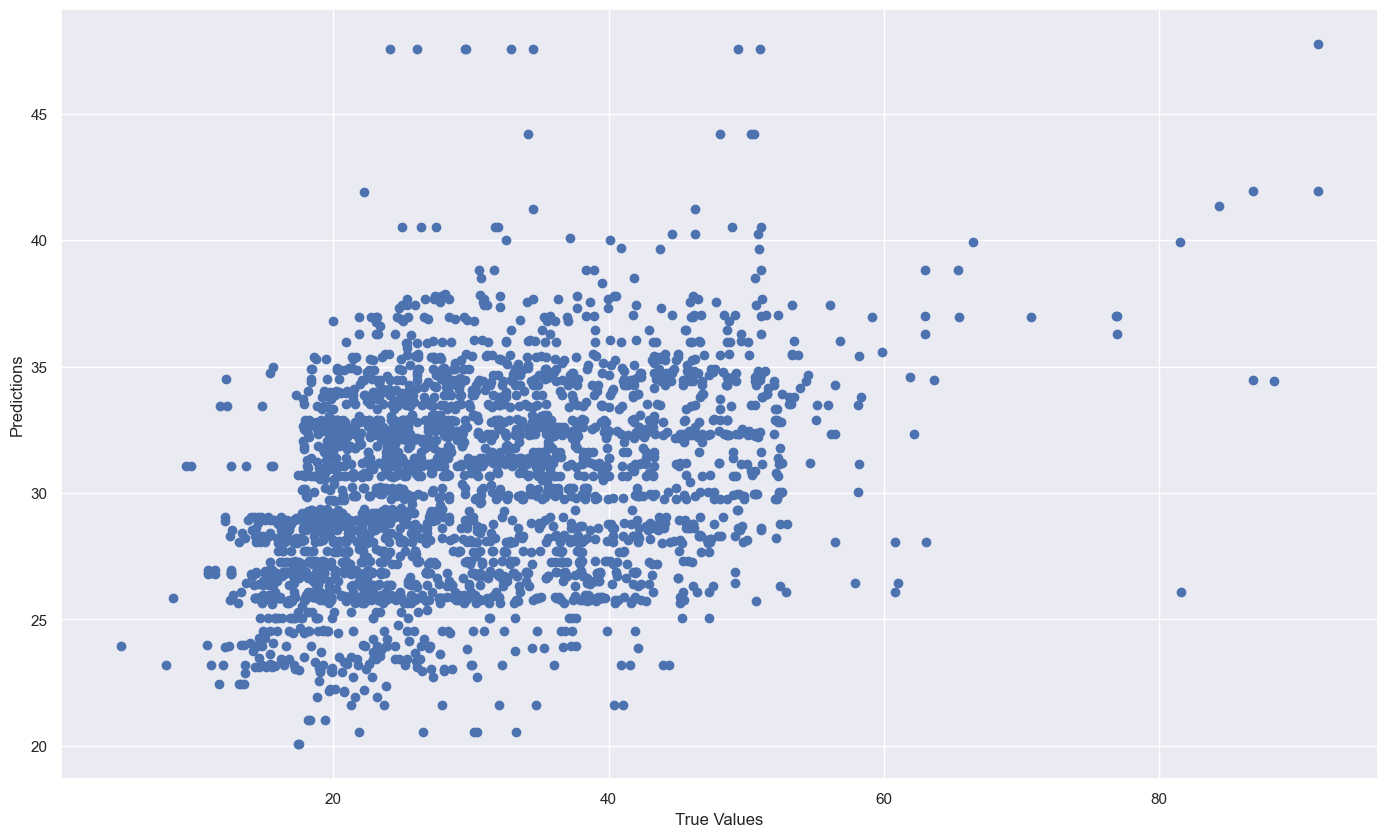

In [47]:
# Making predictions to test the model and plotting the predictions against the true values
predictions = rfe.predict(X_test)
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Now that I have run the Recursive feature elimination (RFE) on my linear regression model, the coefficient of determination remains the same as before at 0.123. This suggests that the original linear regression model was using the same 25 variables that were the most important as the highest coefficients in that model. There are 28 variables in the original model too, so it may just be that the 3 that were removed were not influencing the model too much. 

Next, I will try to use a Lasso regularization model to try to improve the coefficient of determination. 

In [48]:
# Lasso regularization from scikit-learn
from sklearn.linear_model import Lasso

# Apply Lasso regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get feature importance scores
importance = np.abs(lasso.coef_)
feature_names = X_train.columns

# Print feature importance scores
print("Feature Importance Scores:")
for name, score in zip(feature_names, importance):
    print(name, score)

Feature Importance Scores:
Region 2.3868471151410655
EconomicMax 0.03173921586105257
EconomicMin 0.018423321661240496
EmergencyMax 0.048456644710484824
EmergencyMin 0.0057837819101824554
MustRunFlag 3.0924139081581283
SelfScheduledMW 0.00834597135301527
MW 0.018012801325391955
Price1 0.1152865453127638
MW1 0.01904812158580455
Price2 0.19116141921669455
MW2 0.015442274873539474
Price3 0.08574342949393032
MW3 0.16028465590732516
Price4 0.21245665292718835
MW4 0.19417668336963195
Price5 0.06827985699184597
MW5 0.06843028352691256
Price6 0.12047736864083564
MW6 0.0834880748611197
Price7 0.01893616212226279
MW7 0.08032755112101549
Price8 0.15405726882606968
MW8 0.017095805536144034
Price9 0.18367666864656218
MW9 0.020941203365283413
Price10 0.04532328788115096
MW10 0.02385919650390167


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+05, tolerance: 5.249e+01
  model = cd_fast.enet_coordinate_descent(


In [49]:
# Printing out the coefficient of determination, intercepts, and slope for the 
# Linear Regression model
r_sq = lasso.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

print("  ")

print(f"intercept: {lasso.intercept_}")

coefficient of determination: 0.12979786618179057
  
intercept: 35.23109443408693


Text(0, 0.5, 'Predictions')

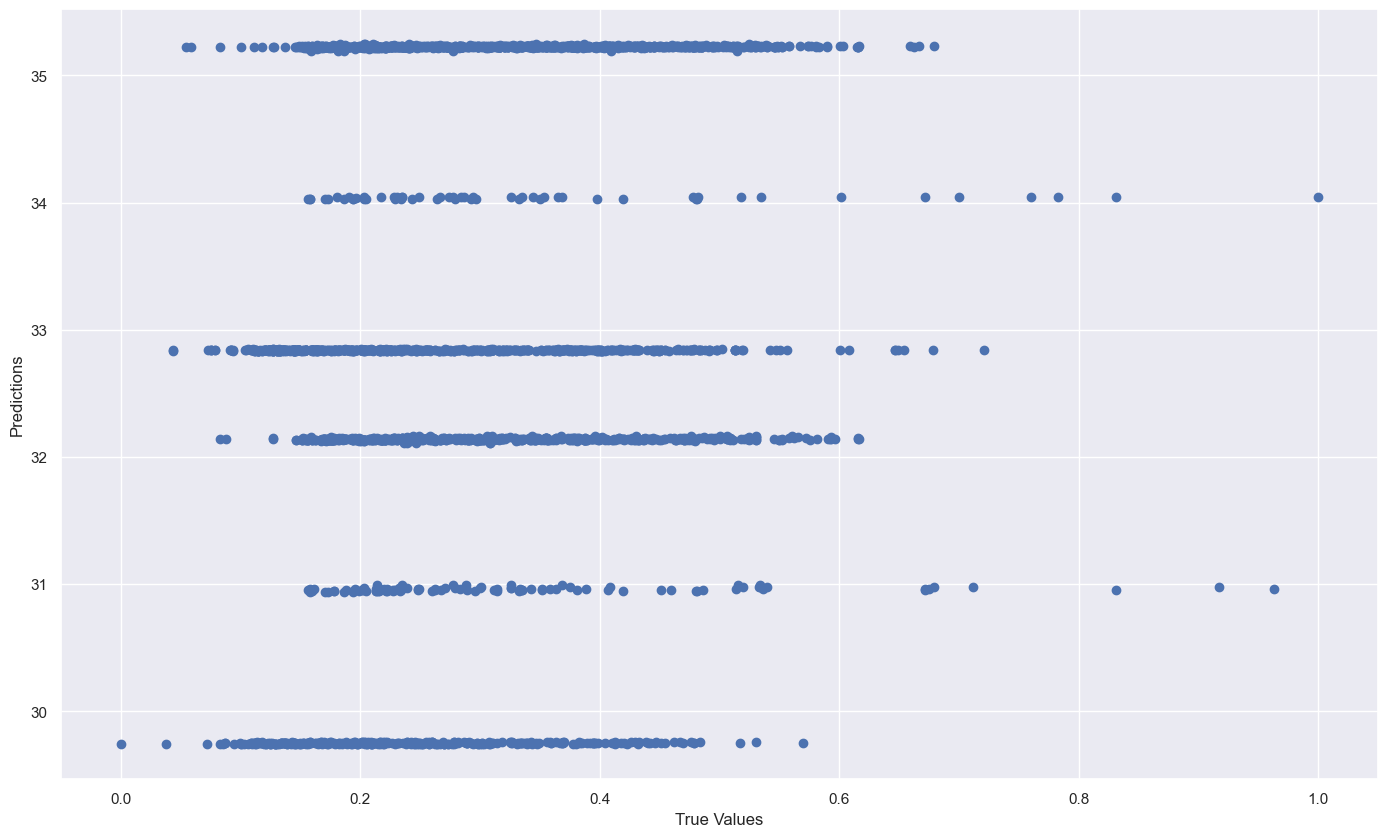

In [50]:
predictions = lasso.predict(X_test_sc)
## The line / model
plt.scatter(y_test_sc, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

From this lasso regularization model, we again find the same coefficient of determinant value of 0.12. The linear regression model, recursive feature elimination model, and lasso regularization model all have coefficient of determinant value of 0.12. 

There are a few things this suggests:
* We need to use more data. 
* Some of the features are irrelevant.
* The relationship between LMP and the features may not be linear.

I will try running a linear regression model with the scaled data to see if the normalized dataset might improve the model. 

In [51]:
# Initlization Linear Regression model for scaled dataset
model = LinearRegression()
model.fit(X_train_sc, y_train_sc)

LinearRegression()

In [53]:
r_sq = model.score(X_test_sc, y_test_sc)
print(f"coefficient of determination: {r_sq}")

print(" ")

print(f"intercept: {model.intercept_}")

importance = np.abs(model.coef_)
feature_names = X_train.columns

print(" ")

# Print feature importance scores
print("Coeffecients:")
for name, score in zip(feature_names, importance):
    print(name, score)

coefficient of determination: 0.1150495162677464
 
intercept: 0.3451198076132816
 
Coeffecients:
Region 0.05660319588788211
EconomicMax 0.22345053304581997
EconomicMin 0.07762911174074336
EmergencyMax 0.3189077773262132
EmergencyMin 0.09565454650576519
MustRunFlag 0.04056028459876367
SelfScheduledMW 0.023637995434757607
MW 0.16449949253344254
Price1 0.3164872378390846
MW1 0.07507002296715634
Price2 0.7388395707001741
MW2 0.19399526717971782
Price3 0.17007493405468826
MW3 1.1273066065461725
Price4 0.8281876957697041
MW4 1.6172278854856013
Price5 0.7064554132363912
MW5 0.6750618111906482
Price6 0.9108605189853219
MW6 1.0546020811403523
Price7 0.01294759052393152
MW7 1.1161879457101123
Price8 0.4100858141094797
MW8 0.38722441227736737
Price9 0.6735503889253966
MW9 0.11359598469265254
Price10 0.25731856679522336
MW10 0.012193333345302051


Text(0, 0.5, 'Predictions')

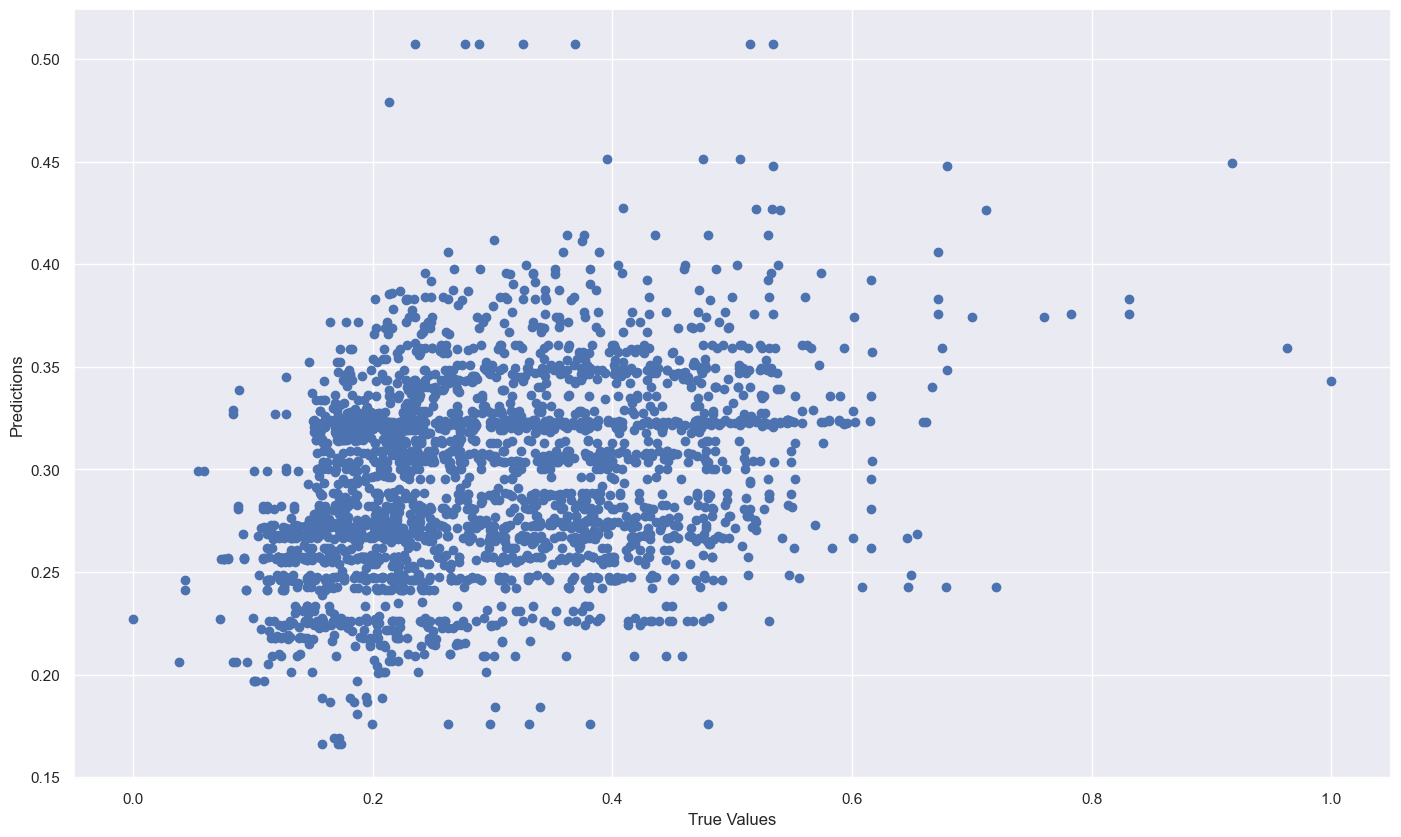

In [54]:
predictions = model.predict(X_test_sc)
## The line / model
plt.scatter(y_test_sc, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

From this linear regression model, the coefficient of determination is 0.11. This suggests that the model's performance did not change using normalized data. 

Next, I will use a Random Forest model. 

#### Random Forest

Train accuracy: 0.45420981366404156
Test accuracy: 0.37445965708616835
 


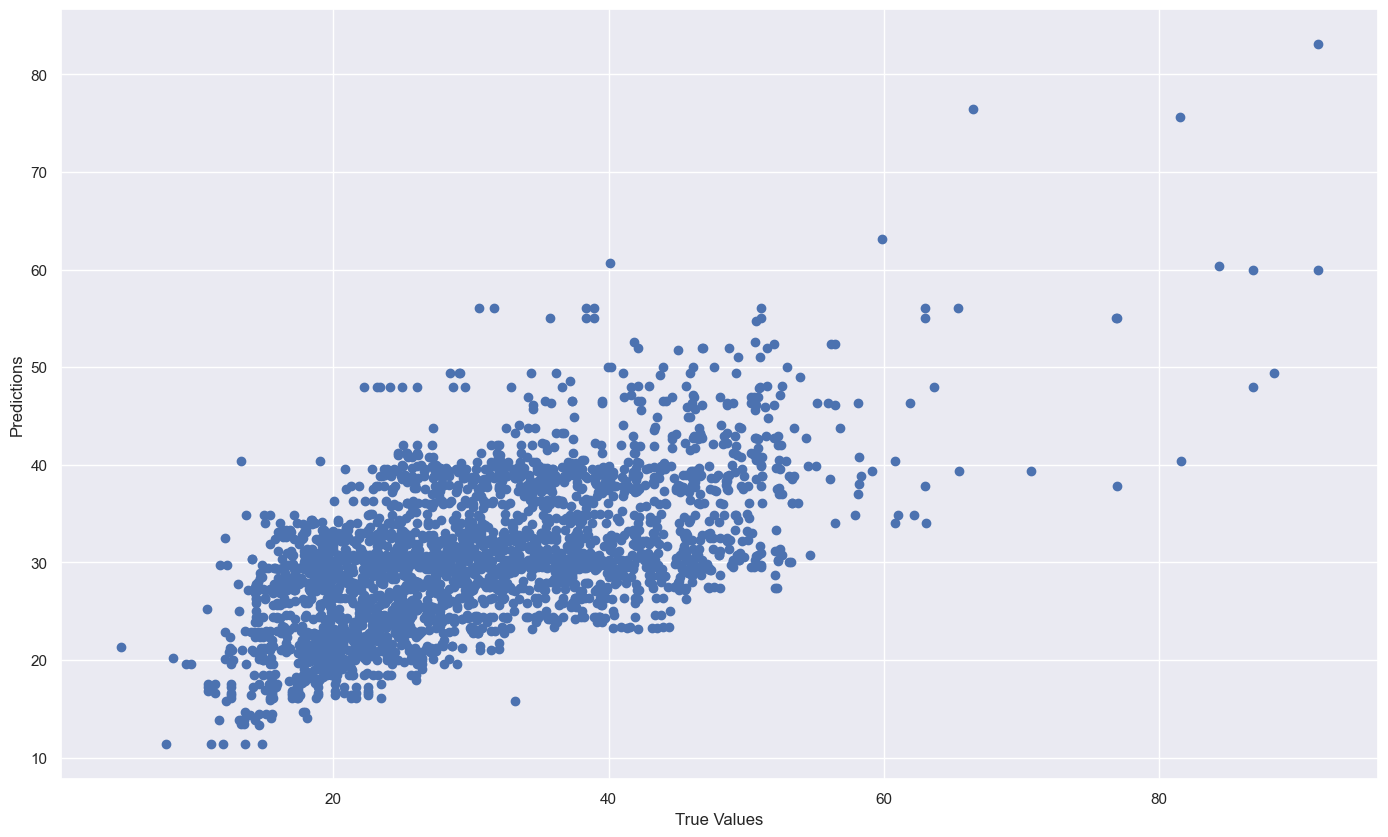

In [59]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X, y, n_estimators=100):
    # Create a random forest regressor
    model = RandomForestRegressor(n_estimators=n_estimators)

    # Fit the model to the data
    model.fit(X, y)

    return model

model = random_forest(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print(" ")

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
r_sq = model.score(X_test, y_test)

In this random forest model, I used the un-scaled data. The training accuracy is 0.45 while the testing accuracy is 0.37. The difference between the training and testing accuracy is not very big (0.08), but the model may be overfitting. We can try scaling the data to improve the performance of the model. 

This random forest model has a much better training and test accuracy than the linear regression model. This suggests that the random forest model is better fitting the data and is able to capture the underlying relationships between the features and the target variable than the linear regression model.

Let's now try to use the random forest model on the scaled data. 

Train accuracy: 0.47710667776029336
Test accuracy: 0.34672670961515484
 


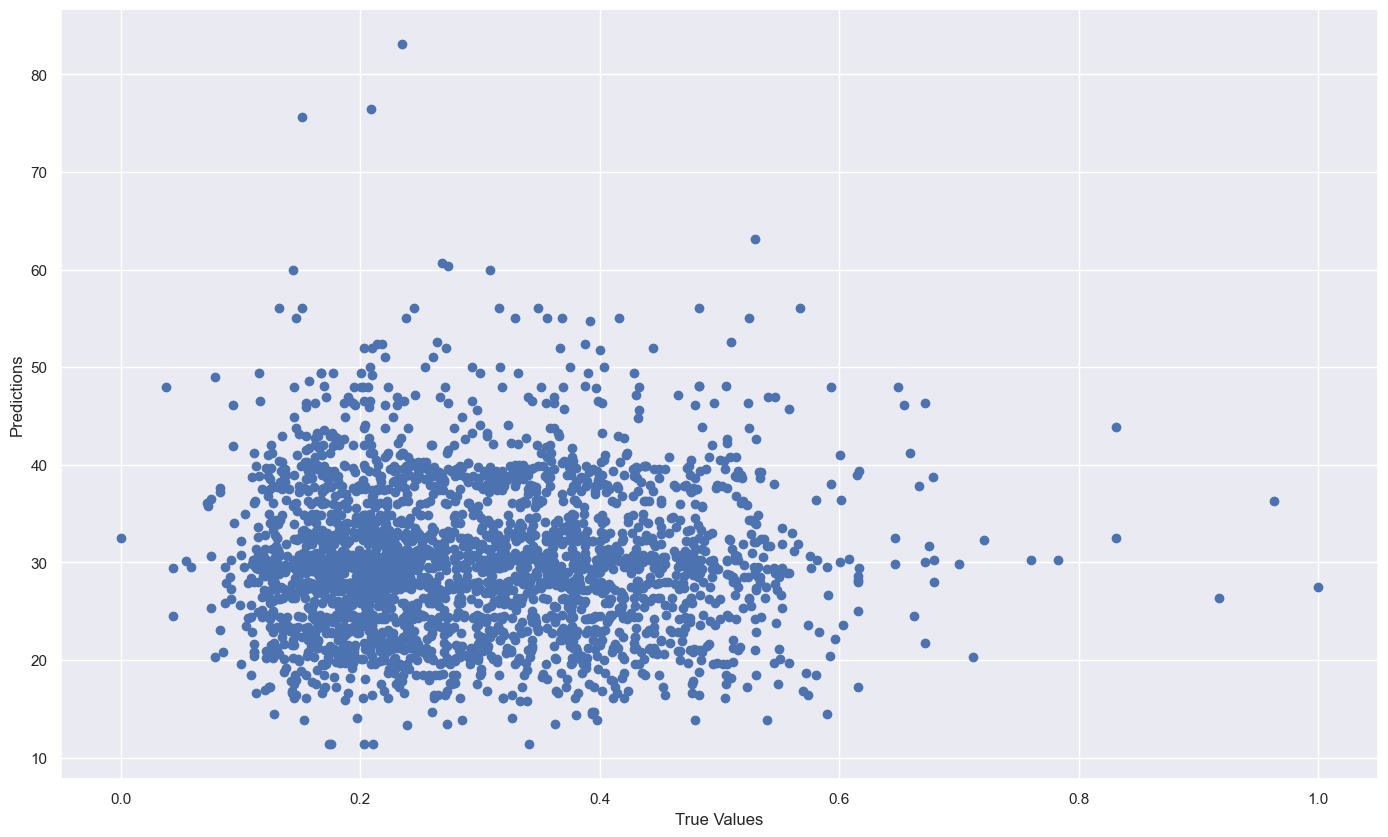

In [66]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X, y, n_estimators=100):
    # Create a random forest regressor
    model = RandomForestRegressor(n_estimators=n_estimators)

    # Fit the model to the data
    model.fit(X, y)

    return model

model = random_forest(X_train_sc, y_train_sc)

# Make predictions
train_preds = model.predict(X_train_sc)
test_preds = model.predict(X_test_sc)

train_r2 = r2_score(y_train_sc, train_preds)
test_r2 = r2_score(y_test_sc, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print(" ")

## The line / model
plt.scatter(y_test_sc, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
r_sq = model.score(X_test, y_test)

The random forest model using the scaled data has a training accuracy of 0.47 and a testing accuracy of 0.34 (the difference is 0.13). Compared to the random forest model without the scaled data, the training accuracy went up while the testing accuracy went down. This suggets that using the scaled data actually made the model overfit more than before. It is possible that scaling the data could have allowed the model to pick up on hidden patterns in the training data, which resulted in higher training accuracy but poorer performance on the testing data. We can try to improve this by making the model less complex using regularization parameters. 

Train accuracy: 0.42978231497450803
Test accuracy: 0.3266901548972043
 


Text(0, 0.5, 'Predictions')

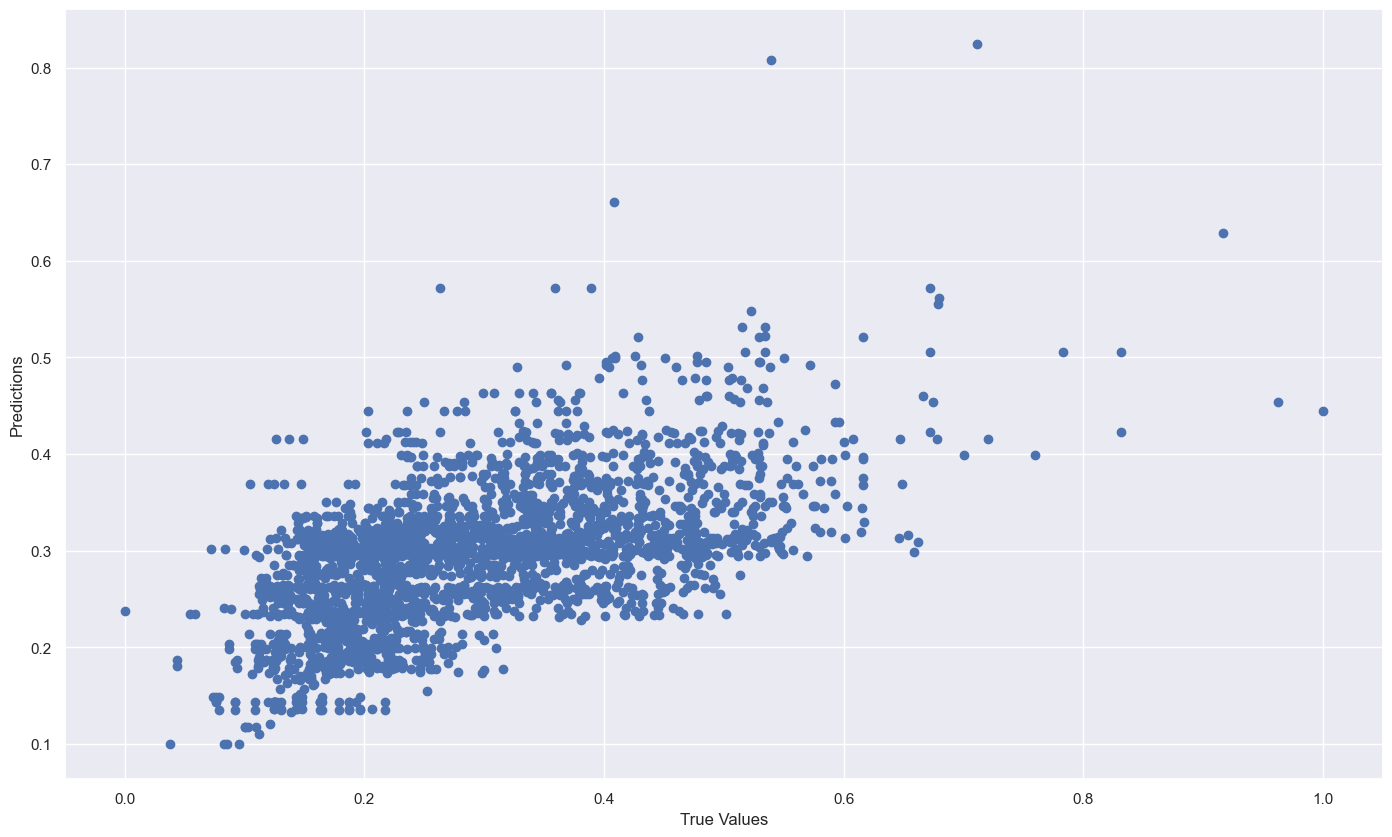

In [67]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X, y, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    # Create a random forest regressor
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf)

    # Fit the model to the data
    model.fit(X, y)

    return model

model = random_forest(X_train_sc, y_train_sc, n_estimators=100, 
                      max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Make predictions
train_preds = model.predict(X_train_sc)
test_preds = model.predict(X_test_sc)

train_r2 = r2_score(y_train_sc, train_preds)
test_r2 = r2_score(y_test_sc, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print(" ")

## The line / model
plt.scatter(y_test_sc, test_preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In this random forest model with the scaled data using regularization techniques that decrease the model's compelxity by setting lower values for the maximum depth of the tree, the minimum number of splits, and the minimum number of samples at a leafnode, we were able to decrease the difference between the training and testing accuracy to 0.1. The training accuracy here is 0.43 and the testing accuracy is 0.33. 

Overall, we saw improvements from the linear regression model to this random forest model which is great! The random forest model was able to reach 0.37 for the testing accuracy (the first version of the random forest model) which means that it was able to explain 37% of the variability in the data. We can try other models to see if this testing accuracy can be improved further. 

#### Decision Tree

Train accuracy: 0.4576889718262356
Test accuracy: 0.3687319413516449
 


Text(0, 0.5, 'Predictions')

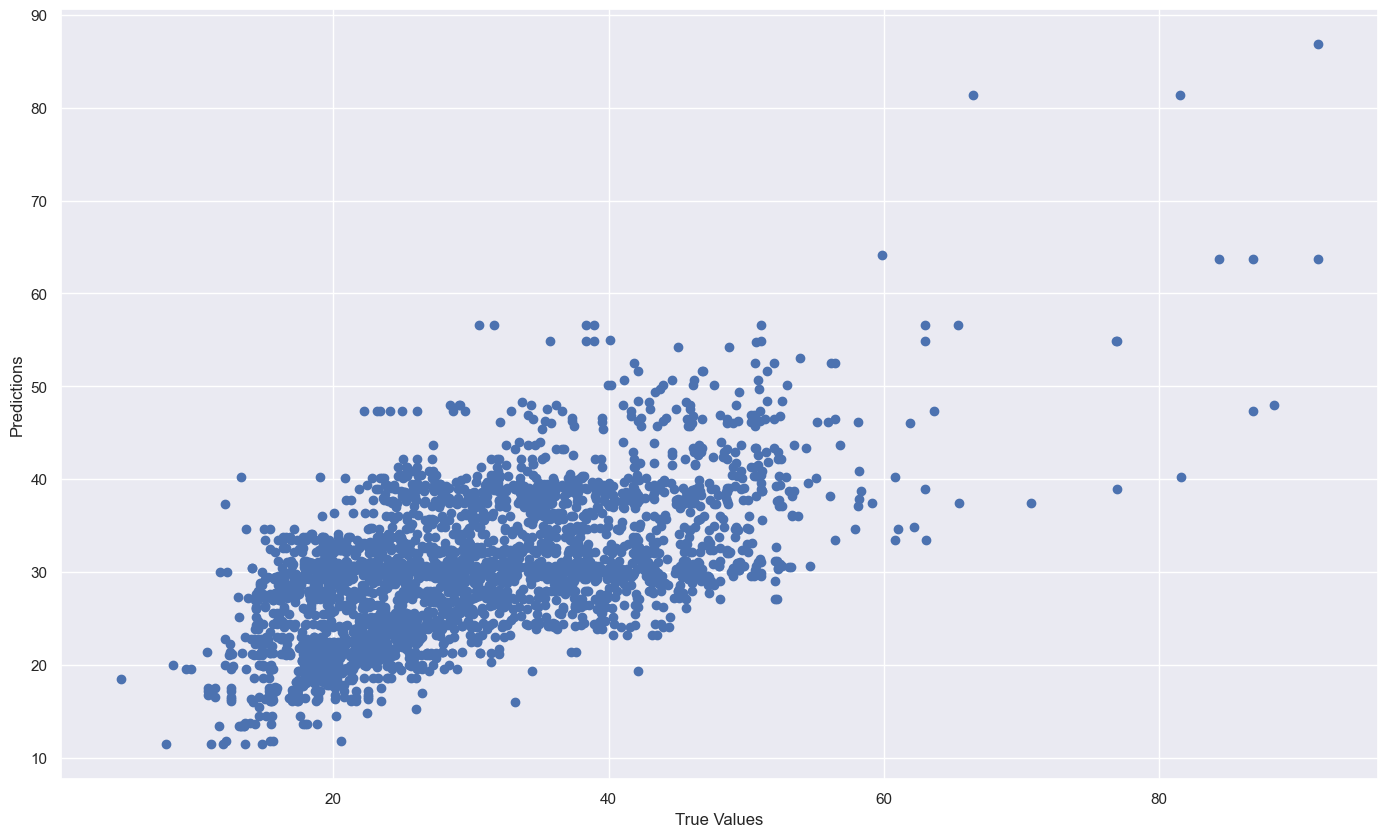

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit the decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print(" ")

## The line / model
plt.scatter(y_test, test_preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')

This decision tree model has similiar accuracy rates to the random forest model seen before. Let's improve this by using feature selection and adjusting hyperparameters to then fit the best decision tree model. 

Mean squared error: 82.69
Coefficient of determination: 0.32
Selected features: Index(['Region', 'MW', 'MW3', 'MW5', 'MW6'], dtype='object')
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
 
Train accuracy: 0.3574982665112455
Test accuracy: 0.32235460815639805
 


Text(0, 0.5, 'Predictions')

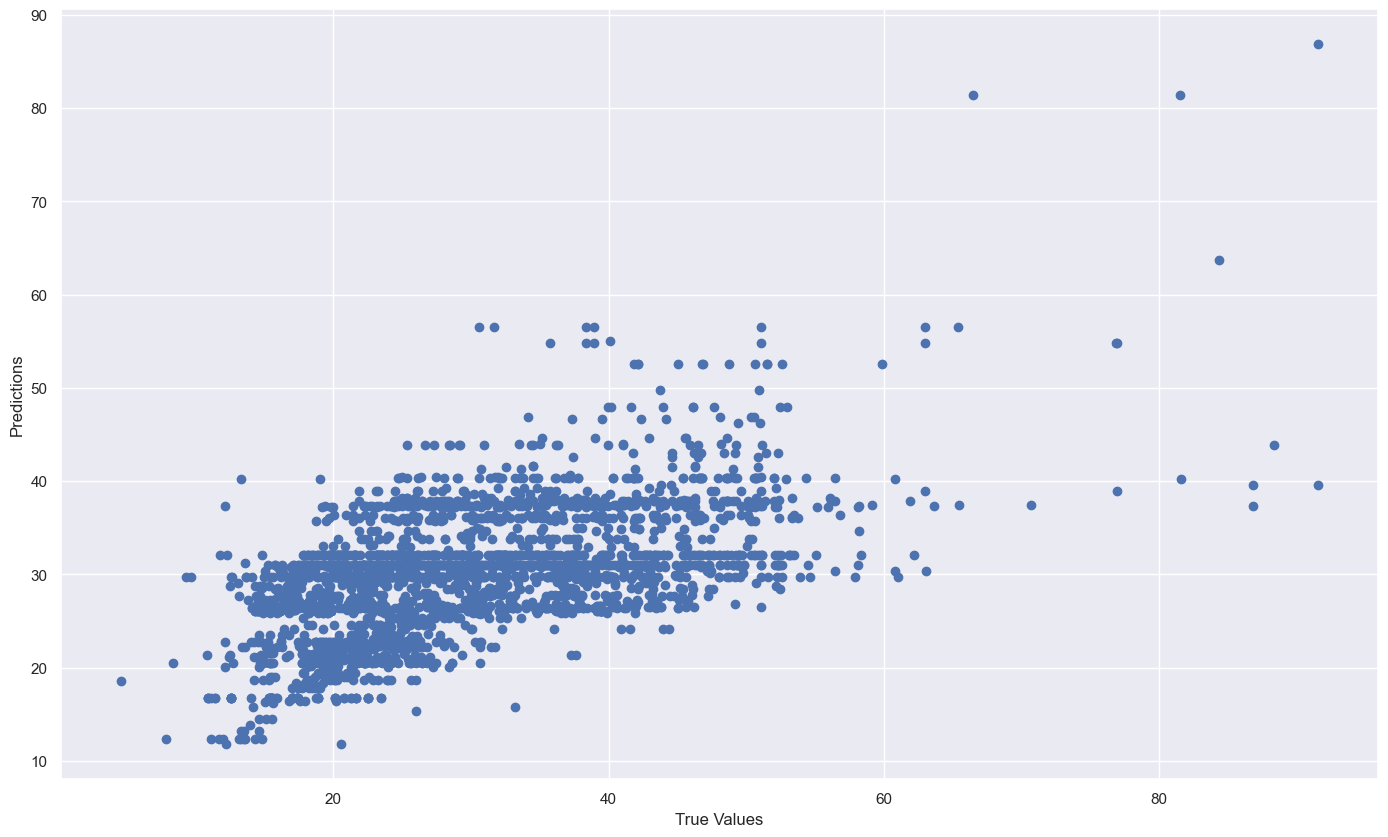

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using SelectKBest with f_regression
selector = SelectKBest(f_regression, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize and fit the decision tree model with GridSearchCV
model = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sel, y_train)

# Use the best model to make predictions on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sel)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")
print(f"Selected features: {selected_features}")
print(f"Best hyperparameters: {grid_search.best_params_}")

print(" ")

# Make predictions
train_preds = best_model.predict(X_train_sel)
test_preds = best_model.predict(X_test_sel)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

print(" ")

## The line / model
plt.scatter(y_test, test_preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')


This decision tree model has the closest training and test accuracy, which means we were able to reduce overfitting! The best hyperparameters were 'max_depth' of 10, 'min_samples_leaf' of 1, and 'min_samples_split' of 2. Overall, the feature selection and hyperparameter tuning process has resulted in a more robust and accurate model.

The factors this model selected as the most influential to the model are the region, MW offer, and MW's 3rd, 5th, and 6th offer blocks. This indicates that these features have a strong influence on the LMP offer. 

The MSE value here is 82.69, which suggests that the model's predictions on average are off by about 82.69 units squared. 

#### Simple Neural Network

In [105]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

def neural_network(X, y):
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=[28]))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))

    # Output layer
    model.add(layers.Dense(1))

    # Compile the model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    # Fit the model to the data
    history = model.fit(X, y, epochs=150)

    return model

model = neural_network(X_train_sc, y_train_sc)

Epoch 1/150
136/136 [==============================] - 2s 3ms/step - loss: 0.0268 - accuracy: 2.3111e-04
Epoch 2/150
136/136 [==============================] - 1s 4ms/step - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 3/150
136/136 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 4/150
136/136 [==============================] - 1s 4ms/step - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 5/150
136/136 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6/150
136/136 [==============================] - 1s 5ms/step - loss: 0.0140 - accuracy: 2.3111e-04
Epoch 7/150
136/136 [==============================] - 1s 5ms/step - loss: 0.0138 - accuracy: 2.3111e-04
Epoch 8/150
136/136 [==============================] - 1s 5ms/step - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 9/150
136/136 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 2.3111e-04
Epoch 10/150
136/136 [==============================] -

In [106]:
# Make predictions
train_preds = model.predict(X_train_sc)
test_preds = model.predict(X_test_sc)

train_r2 = r2_score(y_train_sc, train_preds)
test_r2 = r2_score(y_test_sc, test_preds)

print(f"Train accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")

91/91 [==============================] - 0s 3ms/step
Train accuracy: 0.33725322849844885
Test accuracy: 0.292036094946865


This time series model includes 1 input layer, 2 hidden layers, and 1 output layer. The input and hidden layers use the ReLU activation. The model was fit on 150 epochs using the mean squared error loss and Adam optimizer. The training and testing accuracy were 0.33 and 0.29 relatively. There does not seem to be too much over fitting in this model. It will help to further tune this neural network though to improve the accuracy. In the next notebook I will also try to add more data and features to train on the neural network!

### Conclusion

This report covers the data analysis, exploratory visualization, and machine learning models applied to the MISO market. One of the primary challenges of the MISO market is its vulnerability to significant price fluctuations, leading to uncertainty among market participants and consumers. These fluctuations are typically caused by various factors such as shifts in fuel prices, transmission constraints, and weather events. This notebook is the start to determining some of these price fluctuations within the MISO market. 

The data provided through MISO was used to study the behavior of the Locational Marginal Price (LMP) value.

The major technical problem in this notebook was to understand the target variable (the LMP) and it's features and assess their behaviour. This was accomplished by utilizing a time series plot and other statistical tools and graphs. 

Once the data was loaded, it was cleaned. This involved removing missing values, removing duplicates, and outliers. Once the data was prepared, I analyzed the trends in the mean and standard deviation of the features. Next, through time-series plots we were able to the trends in LMP offers and MW offers by region. The histograms of LMP and MW offers displayed the distribution and trends in the offers. The correlation matrix allowed us to further understand which pairs of variables were related and we identified some of the reasons why those variables were related. The box plots indicated outliers in the features and we were able to remove them from there. The scatterplots showed the distribution of each feature with the LMP offers which gave insight into which features we can expect to be significant in our models.

By using a combination of different models, I gained a better understanding of which features impact the LMP offers. The linear regression models had the lowest accuracy which after building further models indicated that the relationship between LMP offers and the features may not be linear. The random forest models accuracies were an improvement from the linear regression models and we were able to fine tune these models to reduce some overfitting. The  decision tree models had similiar accuracy to the random forest model but it had the least difference between the training and test error. Our efforts to reduce overfitting in the decision tree model paid off the most! The decision tree model also indicated which variables were the most significant in predicting the LMP. Lastly we built a simple neural network using 1 input layer, 2 hidden layers, and 1 output layer. The accuracy from the neural network model was similiar to the random forest and decision tree models. In the following deep learning notebook, I will further explore neural network models to work with the time-series predictions of this data to hopefully make more accurate predictions. In the deep learning model, I hope to include more data and features so the models have more samples and can improve their accuracy. 
